In [2]:
import networkx as nx
import matplotlib.pyplot as plt
#create a empty graph without the edge and node
G = nx.Graph()
G

# nodes(vertex)

In [5]:
G.clear()
G.add_node(1)
G.add_node(4)
G.add_nodes_from([3,"sd"])

#add node and node's attribute
G.add_nodes_from([
    (5,{"color":'red'}),
    (6,{"color":'blue'})
])
G.nodes['sd']['color'] = 'green'
G.remove_node(4)
print(G.nodes['sd']['color'])
print(G.nodes)

#add nodes in another graph to the graph
H = nx.path_graph(10)
# print(H.nodes)
# print(H.edges)
G.add_nodes_from(H)
G.nodes

G.add_node("spam")
print("3 nodes: "+ str(G.nodes()))
G.add_nodes_from("spam")
print("4 nodes: "+ str(G.nodes()))

x = list(G.nodes)
x[1]

G.nodes['sd']

green
[1, 3, 'sd', 5, 6]
3 nodes: [1, 3, 'sd', 5, 6, 0, 2, 4, 7, 8, 9, 'spam']
4 nodes: [1, 3, 'sd', 5, 6, 0, 2, 4, 7, 8, 9, 'spam', 's', 'p', 'a', 'm']


{'color': 'green'}

# edge

In [15]:
G.clear()
print(G.nodes())
print(G.edges())
G.add_edge(1,2)
G.add_edge(1,10)
print("1 edges: "+ str(G.edges)+"   "+str(list(G.edges)[0][0]))

# unpack edge tuple*
e = (2,3)
G.add_edge(*e)
print("2 edges: "+ str(G.edges))

G.add_edges_from([(3,4)])
G.add_edges_from([(5,6),(5,7)])
# G.remove_edge(3,3)
print("3 nodes: "+ str(G.nodes()))
print("3 edges: "+ str(G.edges))

G.add_edges_from(H.edges)
print("4 edges: "+ str(G.edges))

#edge weight

G.add_edge(2,4,weight = 7.8)
print("5 edge (2,4)'s weight is "+ str(G.edges[2,4]['weight']))
print("5 edge (2,4)'s weight is "+ str(G[2][4]['weight']))

#edge attribute
es = [(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})]
N = nx.Graph(es)
N[1][2]

[]
[]
1 edges: [(1, 2), (1, 10)]   1
2 edges: [(1, 2), (1, 10), (2, 3)]
3 nodes: [1, 2, 10, 3, 4, 5, 6, 7]
3 edges: [(1, 2), (1, 10), (2, 3), (3, 4), (5, 6), (5, 7)]
4 edges: [(1, 2), (1, 10), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)]
5 edge (2,4)'s weight is 7.8
5 edge (2,4)'s weight is 7.8


{'color': 'blue'}

# number of edges and nodes

In [107]:
nodes = G.number_of_nodes()
print(nodes)
edges = G.number_of_edges()
edges

8


2

# check the element of graph

In [257]:
G.clear()
v = [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
G.add_nodes_from(v)
e = [(1, 2), (1, 3), (3, 'm')]
G.add_edges_from(e)

#list the nodes and edges
print(list(G.nodes))
print(list(G.edges))
G.edges[1,3]['weigth'] = 11.2

# check the neighbour 
print('adj is')
print(list(G.adj[1]))
print(list(G.neighbors(3)))
G.degree(1)
G.degree(2)

print()
print(G.edges([3]))
print(G[3])

print()
print(G.edges([2,'m']))
print(G.degree([2,'m',3]))




[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
adj is
[2, 3]
[1, 'm']

[(3, 1), (3, 'm')]
{1: {'weigth': 11.2}, 'm': {}}

[(2, 1), ('m', 3)]
[(2, 1), ('m', 1), (3, 2)]


# 使用图形构造函数

In [185]:
G.clear()
G.add_edge(1,2)
G.add_edge(3,4)
H = nx.DiGraph(G)
print(H.edges)

edgelist = [(0, 1), (1, 2), (2, 3)]
M = nx.Graph(edgelist)
print(M.nodes)
M.edges()

[(1, 2), (2, 1), (3, 4), (4, 3)]
[0, 1, 2, 3]


EdgeView([(0, 1), (1, 2), (2, 3)])

# test

[('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'f'), ('d', 'f')]
[('a', 'c'), ('a', 'b'), ('b', 'd'), ('c', 'd'), ('c', 'f'), ('d', 'f')]


D:\Anaconda\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


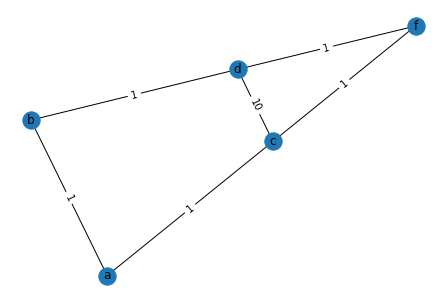

In [3]:
edges = (('a','b',{'weight':1}),('a','c',{'weight':1}),('d','b',{'weight':1}),
         ('c','d',{'weight':10}),('c','f',{'weight':1}),('f','d',{'weight':1}))
G = nx.Graph(edges)
weight = 'weight'
G_prime = nx.spanner(G,3.0,weight)
print(G.edges)
print(G_prime.edges)


pos = nx.spring_layout(G)
nx.draw(G_prime,pos,with_labels=True)
edge_labels = nx.get_edge_attributes(G_prime,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

# Greedy algorithm

In [35]:
import networkx as nx
import matplotlib.pyplot as plt


def greedy(G,t,weight=None):
    edges = list(G.edges)
    weighted_edges = sorted(G.edges(data=True), key=lambda t: t[2].get(weight, 1))
    nodes = list(G.nodes)
    
    G_prime = nx.Graph()
    G_prime.add_nodes_from(nodes)
    print(G_prime)
    for edge in weighted_edges:
#         print("========")
#         print(edge)
#         print(edge[0]+edge[1]+ weight)
        try:
            shortest_dist = nx.dijkstra_path_length(G_prime,edge[0],edge[1],weight)
        except Exception:
            shortest_dist = float('inf')
#         print(shortest_dist)
#         print(t * (G[edge[0]][edge[1]][weight]) )
        
        if(shortest_dist > t * (G[edge[0]][edge[1]][weight]) ):
#             print("added")
            add_edge = [(edge[0],edge[1],{weight :(G[edge[0]][edge[1]][weight]) })]
            G_prime.add_edges_from(add_edge)
#         print(G_prime.edges)
#         print("========")
#     print(G_prime.edges)
    return G_prime

        
    
        
    


In [36]:
edges = (('a','b',{'weight':1}),('a','c',{'weight':1}),('d','b',{'weight':1}),
         ('c','d',{'weight':10}),('c','f',{'weight':4}),('f','d',{'weight':1}))
# edges = (('a','b'),('a','c'),('d','b'),
#          ('c','d'),('c','f'),('f','d'))
G.clear()
edges = (('a','b',{'weight':100}),('a','c',{'weight':100}),('d','b',{'weight':100}),
         ('c','d',{'weight':1000}),('c','f',{'weight':100}),('f','d',{'weight':100}))
G = nx.Graph(edges)

# dis = nx.dijkstra_path_length(G,'a','h',weight="weight")
G_prime = greedy(G,3,"weight")
print(G_prime)
print(G_prime.edges(data = True))
# paths = nx.all_shortest_paths(G,'f','c','weight')


Graph with 5 nodes and 0 edges
Graph with 5 nodes and 5 edges
[('a', 'b', {'weight': 100}), ('a', 'c', {'weight': 100}), ('b', 'd', {'weight': 100}), ('c', 'f', {'weight': 100}), ('d', 'f', {'weight': 100})]


In [147]:
a = float("inf")
b =3
a>b

True

# Probabilistic algorithm

In [76]:
import networkx as nx
import numpy as np
import math
def pro(G,K,c=4,weight=None):
    k = math.floor((K +1)/2)
    N = G.number_of_nodes()
    lam = math.log(c*N)/k
    nodes = list(G.nodes)
    
    G_prime = nx.Graph()
    G_prime.add_nodes_from(nodes)

#     m_u_x = [{nodes[i]:{}} for i in range (len(G.nodes))]
    m_u_x = [[() for j in range (len(G.nodes))] for i in range (len(G.nodes))]
    for i in range(len(G.nodes)):
        ru = np.random.exponential(lam)
        for x in range(len(G.nodes)):
            if i == x:
                continue
            if(nx.dijkstra_path_length(G,nodes[i],nodes[x],weight) <= k):
                p_u_x = nx.dijkstra_path(G,nodes[x],nodes[i],weight)[1]
                m_u_x[x][i] = ((ru - nx.dijkstra_path_length(G,nodes[x],nodes[i],weight)),p_u_x)
#                 m_x.append([nodes[x],pu_x,(ru - nx.dijkstra_path_length(G,nodes[x],nodes[i],weight))])       
    print(m_u_x)
#     m_x = np.array(m_x)
#     max_mx = float(max(m_x[:,2]))
    
    for x in range(len(G.nodes)):
        m_x = max(m_u_x[x])[0]
        for u in range(len(G.nodes)): 
            if(len(m_u_x[x][u])>0):
                if(m_u_x[x][u][0] > m_x - 1):
                    G_prime.add_edge(nodes[x],m_u_x[x][u][1])
    return G_prime
    

In [77]:
edges = (('a','b',{'weight':1}),('a','c',{'weight':1}),('d','b',{'weight':1}),
         ('c','d',{'weight':1}),('c','f',{'weight':1}),('f','d',{'weight':1}))
# edges = (('a','b'),('a','c'),('d','b'),
#          ('c','d'),('c','f'),('f','d'))

G = nx.Graph(edges)

gp= pro(G,3,4,weight='weight')

gp.edges

# m_u_x = [[() for j in range (len(G.nodes))] for i in range (len(G.nodes))]
# # type(m_u_x[0])
# m_u_x

# m_u_x[0][0] = (1,'c')
# m_u_x[0][3] = (5,'a')
# # xx = [('a','c',15),('d','e',10)]
# # # max()
# # xx=  np.array(xx)
# # xx[:,2]
# # 
# m_u_x[0]
# m_u_x=  np.array(m_u_x)
# max(
# m_u_x[0])[0]
# # m_u_x[0][:,1]
# # m_u_x[0,:]
# m_u_x[0][0][0]

[[(), (-0.37465454088905314, 'b'), (0.4118014181840455, 'c'), (2.5093139608629063, 'b'), (-1.2996239248597967, 'c')], [(1.7352950774914686, 'a'), (), (-0.5881985818159545, 'a'), (3.5093139608629063, 'd'), (-1.2996239248597967, 'd')], [(1.7352950774914686, 'a'), (-1.3746545408890531, 'a'), (), (3.5093139608629063, 'd'), (-0.29962392485979683, 'f')], [(0.7352950774914686, 'b'), (-0.37465454088905314, 'b'), (0.4118014181840455, 'c'), (), (-0.29962392485979683, 'f')], [(0.7352950774914686, 'c'), (-1.3746545408890531, 'd'), (0.4118014181840455, 'c'), (3.5093139608629063, 'd'), ()]]


EdgeView([('a', 'b'), ('b', 'd'), ('c', 'd'), ('d', 'f')])

In [57]:
print(nx.dijkstra_path(G,'a','f',"weight"))
nx.dijkstra_path(G,'f','a',None)

['a', 'c', 'f']


['f', 'c', 'a']

In [254]:
import networkx as nx
下 = nx.spanner(G,3)
下.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'f'), ('c', 'd')])

# clustering and path buying

In [231]:
import networkx as nx
import numpy as np
import math

from networkx.utils import not_implemented_for, py_random_state

__all__ = ["spanner"]

@py_random_state(3)
@not_implemented_for("directed")
@not_implemented_for("multigraph")
def spanner(G, stretch, weight=None, seed=None):
    """Returns a spanner of the given graph with the given stretch.

    A spanner of a graph G = (V, E) with stretch t is a subgraph
    H = (V, E_S) such that E_S is a subset of E and the distance between
    any pair of nodes in H is at most t times the distance between the
    nodes in G.

    Parameters
    ----------
    G : NetworkX graph
        An undirected simple graph.

    stretch : float
        The stretch of the spanner.

    weight : object
        The edge attribute to use as distance.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    NetworkX graph
        A spanner of the given graph with the given stretch.

    Raises
    ------
    ValueError
        If a stretch less than 1 is given.

    Notes
    -----
    This function implements the spanner algorithm by Baswana and Sen,
    see [1].

    This algorithm is a randomized las vegas algorithm: The expected
    running time is O(km) where k = (stretch + 1) // 2 and m is the
    number of edges in G. The returned graph is always a spanner of the
    given graph with the specified stretch. For weighted graphs the
    number of edges in the spanner is O(k * n^(1 + 1 / k)) where k is
    defined as above and n is the number of nodes in G. For unweighted
    graphs the number of edges is O(n^(1 + 1 / k) + kn).

    References
    ----------
    [1] S. Baswana, S. Sen. A Simple and Linear Time Randomized
    Algorithm for Computing Sparse Spanners in Weighted Graphs.
    Random Struct. Algorithms 30(4): 532-563 (2007).
    """
    if stretch < 1:
        raise ValueError("stretch must be at least 1")

    k = (stretch + 1) // 2

    # initialize spanner H with empty edge set
    H = nx.empty_graph()
    H.add_nodes_from(G.nodes)

    # phase 1: forming the clusters
    # the residual graph has V' from the paper as its node set
    # and E' from the paper as its edge set
    residual_graph = _setup_residual_graph(G, weight)
    # clustering is a dictionary that maps nodes in a cluster to the
    # cluster center
    clustering = {v: v for v in G.nodes}
    sample_prob = math.pow(G.number_of_nodes(), -1 / k)
    size_limit = 2 * math.pow(G.number_of_nodes(), 1 + 1 / k)

    i = 0
    while i < k - 1:
        # step 1: sample centers
        sampled_centers = set()
        for center in set(clustering.values()):
            #test3
#             print(seed.random())
#             print(sample_prob)
            if seed.random() < sample_prob:
                sampled_centers.add(center)

        # combined loop for steps 2 and 3
        edges_to_add = set()
        edges_to_remove = set()
        new_clustering = {}
        for v in residual_graph.nodes:
            if clustering[v] in sampled_centers:
                continue

            # step 2: find neighboring (sampled) clusters and
            # lightest edges to them
            lightest_edge_neighbor, lightest_edge_weight = _lightest_edge_dicts(
                residual_graph, clustering, v
            )
            neighboring_sampled_centers = (
                set(lightest_edge_weight.keys()) & sampled_centers
            )

            # step 3: add edges to spanner
            if not neighboring_sampled_centers:
                # connect to each neighboring center via lightest edge
                for neighbor in lightest_edge_neighbor.values():
                    edges_to_add.add((v, neighbor))
                    
                # remove all incident edges
                for neighbor in residual_graph.adj[v]:
                    if(neighbor in clustering.keys()):
                        edges_to_remove.add((v, neighbor))

            else:  # there is a neighboring sampled center
                closest_center = min(
                    neighboring_sampled_centers, key=lightest_edge_weight.get
                )
                closest_center_weight = lightest_edge_weight[closest_center]
                closest_center_neighbor = lightest_edge_neighbor[closest_center]

                edges_to_add.add((v, closest_center_neighbor))
                #test1 错误，要把所有 v 到closest 的边都删除
#                 edges_to_remove.add((v, closest_center_neighbor))
                new_clustering[v] = closest_center

                # connect to centers with edge weight less than
                # closest_center_weight
                for center, edge_weight in lightest_edge_weight.items():
                    if edge_weight < closest_center_weight:
                        neighbor = lightest_edge_neighbor[center]
                        edges_to_add.add((v, neighbor))
                        #test2
#                         edges_to_remove.add((v, neighbor))

                # remove edges to centers with edge weight less than
                # closest_center_weight
             
                for neighbor in residual_graph.adj[v]:
                    if(neighbor in clustering.keys()):
                        neighbor_cluster = clustering[neighbor]
                        neighbor_weight = lightest_edge_weight[neighbor_cluster]
                        if (
                            neighbor_cluster == closest_center
                            or neighbor_weight < closest_center_weight
                        ):
                            edges_to_remove.add((v, neighbor))
                

        # check whether iteration added too many edges to spanner,
        # if so repeat
        if len(edges_to_add) > size_limit:
            # an iteration is repeated O(1) times on expectation
            continue

        # iteration succeeded
        i = i + 1

        # actually add edges to spanner
        for u, v in edges_to_add:
            _add_edge_to_spanner(H, residual_graph, u, v, weight)

        # actually delete edges from residual graph
        residual_graph.remove_edges_from(edges_to_remove)

        # copy old clustering data to new_clustering
        for node, center in clustering.items():
            if center in sampled_centers:
                new_clustering[node] = center
        clustering = new_clustering
        
        # step 4: remove intra-cluster edges
        for u in residual_graph.nodes:
            for v in list(residual_graph.adj[u]):
                if clustering[u] == clustering[v]:
                    residual_graph.remove_edge(u, v)

        # update residual graph node set
        for v in list(residual_graph.nodes):
            if v not in clustering:
                residual_graph.remove_node(v)

    # phase 2: vertex-cluster joining
    for v in residual_graph.nodes:
        lightest_edge_neighbor, _ = _lightest_edge_dicts(residual_graph, clustering, v)
        for neighbor in lightest_edge_neighbor.values():
            _add_edge_to_spanner(H, residual_graph, v, neighbor, weight)

    return H

In [42]:

def _setup_residual_graph(G, weight):
    """Setup residual graph as a copy of G with unique edges weights.

    The node set of the residual graph corresponds to the set V' from
    the Baswana-Sen paper and the edge set corresponds to the set E'
    from the paper.

    This function associates distinct weights to the edges of the
    residual graph (even for unweighted input graphs), as required by
    the algorithm.

    Parameters
    ----------
    G : NetworkX graph
        An undirected simple graph.

    weight : object
        The edge attribute to use as distance.

    Returns
    -------
    NetworkX graph
        The residual graph used for the Baswana-Sen algorithm.
    """
    residual_graph = G.copy()

    # establish unique edge weights, even for unweighted graphs
    for u, v in G.edges():
        if not weight:
            residual_graph[u][v]["weight"] = (id(u), id(v))
        else:
            residual_graph[u][v]["weight"] = (G[u][v][weight], id(u), id(v))

    return residual_graph


def _lightest_edge_dicts(residual_graph, clustering, node):
    """Find the lightest edge to each cluster.

    Searches for the minimum-weight edge to each cluster adjacent to
    the given node.

    Parameters
    ----------
    residual_graph : NetworkX graph
        The residual graph used by the Baswana-Sen algorithm.

    clustering : dictionary
        The current clustering of the nodes.

    node : node
        The node from which the search originates.

    Returns
    -------
    lightest_edge_neighbor, lightest_edge_weight : dictionary, dictionary
        lightest_edge_neighbor is a dictionary that maps a center C to
        a node v in the corresponding cluster such that the edge from
        the given node to v is the lightest edge from the given node to
        any node in cluster. lightest_edge_weight maps a center C to the
        weight of the aforementioned edge.

    Notes
    -----
    If a cluster has no node that is adjacent to the given node in the
    residual graph then the center of the cluster is not a key in the
    returned dictionaries.
    """
    lightest_edge_neighbor = {}
    lightest_edge_weight = {}
    for neighbor in residual_graph.adj[node]:
        neighbor_center = clustering[neighbor]
        weight = residual_graph[node][neighbor]["weight"]
        if (
            neighbor_center not in lightest_edge_weight
            or weight < lightest_edge_weight[neighbor_center]
        ):
            lightest_edge_neighbor[neighbor_center] = neighbor
            lightest_edge_weight[neighbor_center] = weight
    return lightest_edge_neighbor, lightest_edge_weight


In [43]:
def _add_edge_to_spanner(H, residual_graph, u, v, weight):
    """Add the edge {u, v} to the spanner H and take weight from
    the residual graph.

    Parameters
    ----------
    H : NetworkX graph
        The spanner under construction.

    residual_graph : NetworkX graph
        The residual graph used by the Baswana-Sen algorithm. The weight
        for the edge is taken from this graph.

    u : node
        One endpoint of the edge.

    v : node
        The other endpoint of the edge.

    weight : object
        The edge attribute to use as distance.
    """
    H.add_edge(u, v)
    if weight:
        H[u][v][weight] = residual_graph[u][v]["weight"][0]

In [240]:
# import networkx as nx
# import numpy as np
# import math

# test = nx.empty_graph()
# print(test.nodes)
# type(test.edges)

edges = (('a','b',{'weight1':1}),('a','c',{'weight1':1}),('d','b',{'weight1':1}),
         ('c','d',{'weight1':10}),('c','f',{'weight1':1}),('d','f',{'weight1':1}))
# edges = (('a','b'),('a','c'),('d','b'),
#          ('c','d'),('c','f'),('f','d'))

G = nx.Graph(edges)
G.edges()
min_ = 10
for i in range (1000): 
    xx = spanner(G,5,"weight1")
    if(len(xx.edges) < min_):
        edg = xx.edges
        min_ = len(edg)
        print(edg  )
        print(i)
# xx = nx.spanner(G,5,"weight1")
# print(len(xx.edges    )
# G['a']['b']["weight1"][0]
G['a']

[('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'f'), ('d', 'f')]
0
[('a', 'c'), ('b', 'd'), ('c', 'f'), ('d', 'f')]
45


AtlasView({'b': {'weight1': 1}, 'c': {'weight1': 1}})

In [68]:
edges = (('a','b',{'weight':1}),('a','c',{'weight':1}),('d','b',{'weight':1}),
         ('c','d',{'weight':1}),('c','f',{'weight':1}),('f','d',{'weight':1}))
# edges = (('a','b'),('a','c'),('d','b'),
#          ('c','d'),('c','f'),('f','d'))

G = nx.Graph(edges)
G.edges()
# for a in G.edges():
#     if not weight:
#         residual_graph[u][v]["weight"] = (id(u), id(v))
#     else:
#         residual_graph[u][v]["weight"] = (G[u][v][weight], id(u), id(v))
G['a']['b']
print(id('a'))
print(id('a'))
print(id('b'))
print(id('b'))
id('a')
clustering = {v: v for v in G.nodes}
clustering

1695058952816
1695058952816
1695058941232
1695058941232


{'a': 'a', 'b': 'b', 'c': 'c', 'd': 'd', 'f': 'f'}

In [586]:
import random
# seed = 1
# seed.random() <6
from networkx.utils import not_implemented_for, py_random_state


@py_random_state(0)
def te(seed = None):
     print(seed.random())
te()     

0.32777281162209315


In [110]:
x = {'a':6,'b':2}
y = {'a':1,'b':2,'c' :0}
key = x.get
c = ('c','d')
min(x,key = y.get)
x['c']

KeyError: 'c'